**Q1-Taxi Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from collections import Counter
# from IPython.display import Image

from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/MSDSM/SEM_2/Data_Mining/Assignment_1/yellow_tripdata_2023-01.parquet'
file_path1 = '/content/drive/MyDrive/MSDSM/SEM_2/Data_Mining/Assignment_1/ZoneLookup.csv'


In [ ]:
df_original=pd.read_parquet(file_path)


In [ ]:
df = df_original.head(100000)

In [ ]:
zone_lookup_df=pd.read_csv(file_path1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   store_and_fwd_flag     100000 non-null  object        
 7   PULocationID           100000 non-null  int64         
 8   DOLocationID           100000 non-null  int64         
 9   payment_type           100000 non-null  int64         
 10  fare_amount            100000 non-null  float64       
 11  extra                  100000 non-null  float64       
 12  mta_tax                100000 non-null  float

In [ ]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

Exploratory Data Analysis

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.744460,1.538940,4.970080,1.480310,160.19440,157.43376,1.294040,21.671705,1.181867,0.481514,3.524890,0.778123,0.977423,30.343938,2.174275,0.149750
std,0.436166,1.018123,197.255945,5.853282,65.86302,73.73096,0.551655,21.516457,1.598484,0.117993,4.551198,2.526885,0.203760,26.399840,0.897064,0.411379
min,1.000000,0.000000,0.000000,1.000000,1.00000,1.00000,1.000000,-346.000000,-6.000000,-0.500000,-0.900000,-20.750000,-1.000000,-351.000000,-2.500000,-1.250000
25%,1.000000,1.000000,1.200000,1.000000,125.00000,100.00000,1.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,15.000000,2.500000,0.000000
50%,2.000000,1.000000,2.180000,1.000000,158.00000,161.00000,1.000000,14.200000,1.000000,0.500000,2.500000,0.000000,1.000000,20.600000,2.500000,0.000000
75%,2.000000,2.000000,4.860000,1.000000,231.00000,233.00000,2.000000,26.000000,2.500000,0.500000,4.480000,0.000000,1.000000,33.960000,2.500000,0.000000
max,2.000000,6.000000,62359.520000,99.000000,265.00000,265.00000,4.000000,496.500000,9.750000,4.000000,211.500000,49.850000,1.000000,505.800000,2.500000,1.250000


In [ ]:
# Merge with df based on PULocationID for pickup latitude and longitude
df_merged_pickup = pd.merge(df, zone_lookup_df, left_on='PULocationID', right_on='ZoneId', suffixes=('', '_pickup'))
df_merged_pickup.drop(columns=['ZoneId'], inplace=True)

# Merge with df_merged_pickup based on DOLocationID for dropoff latitude and longitude
df_merged_both = pd.merge(df_merged_pickup, zone_lookup_df, left_on='DOLocationID', right_on='ZoneId', suffixes=('', '_dropoff'))
df_merged_both.drop(columns=['ZoneId'], inplace=True)

# Rename Latitude and Longitude columns to avoid conflict
df_merged_both.rename(columns={'Latitude': 'PickupLatitude', 'Longitude': 'PickupLongitude',
                                'Latitude_dropoff': 'DropoffLatitude', 'Longitude_dropoff': 'DropoffLongitude'}, inplace=True)

# Display the updated DataFrame
print(df_merged_both.head())
df_merged=df_merged_both
df_merged.info()

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:21:43   2023-01-01 00:27:52              1.0   
2         2  2023-01-01 00:11:44   2023-01-01 00:20:38              2.0   
3         2  2023-01-01 00:35:52   2023-01-01 00:43:38              2.0   
4         1  2023-01-01 00:51:12   2023-01-01 00:59:38              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           2.00         1.0                  N           161           141   
2           1.83         1.0                  N           161           141   
3           1.41         1.0                  N           161           141   
4           1.80         1.0                  N           161           141   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0

In [ ]:
df_merged.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
PickupLatitude           0
PickupLongitude          0
DropoffLatitude          0
DropoffLongitude         0
dtype: int64

In [ ]:
X=df_merged.iloc[:,[19,20,21,22]].values
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1,min_samples=200,metric='euclidean')
y=db.fit(X)
label=y.labels_
label

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 13


In [ ]:
df_merged['cluster']=label

df1=df_merged[df_merged.cluster==0]
df2=df_merged[df_merged.cluster==1]
df3=df_merged[df_merged.cluster==2]
df4=df_merged[df_merged.cluster==3]
df5=df_merged[df_merged.cluster==4]
df6=df_merged[df_merged.cluster==5]
df7=df_merged[df_merged.cluster==6]
df8=df_merged[df_merged.cluster==7]
df9=df_merged[df_merged.cluster==8]
df10=df_merged[df_merged.cluster==9]
df11=df_merged[df_merged.cluster==10]
df12=df_merged[df_merged.cluster==11]
df13=df_merged[df_merged.cluster==12]

In [ ]:
!pip install geopandas
!pip install descartes

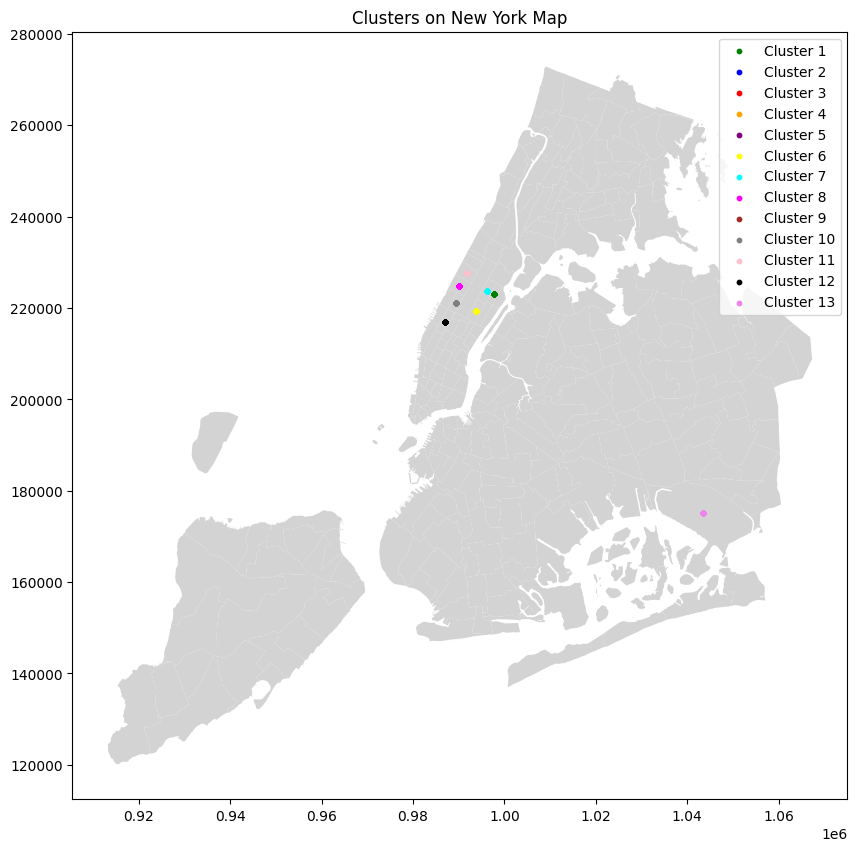

In [ ]:
import geopandas as gpd

import matplotlib.pyplot as plt
fp2 = '/content/drive/MyDrive/MSDSM/SEM_2/Data_Mining/Assignment_1/taxi_zones.shp'
# Read the shapefile for New York map
ny_map = gpd.read_file(fp2)

# Create a GeoDataFrame for each cluster
df1_geo = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1['PickupLongitude'], df1['PickupLatitude']))
df2_geo = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['PickupLongitude'], df2['PickupLatitude']))
df3_geo = gpd.GeoDataFrame(df3, geometry=gpd.points_from_xy(df3['PickupLongitude'], df3['PickupLatitude']))
df4_geo = gpd.GeoDataFrame(df4, geometry=gpd.points_from_xy(df4['PickupLongitude'], df4['PickupLatitude']))
df5_geo = gpd.GeoDataFrame(df5, geometry=gpd.points_from_xy(df5['PickupLongitude'], df5['PickupLatitude']))
df6_geo = gpd.GeoDataFrame(df6, geometry=gpd.points_from_xy(df6['PickupLongitude'], df6['PickupLatitude']))
df7_geo = gpd.GeoDataFrame(df7, geometry=gpd.points_from_xy(df7['PickupLongitude'], df7['PickupLatitude']))
df8_geo = gpd.GeoDataFrame(df8, geometry=gpd.points_from_xy(df8['PickupLongitude'], df8['PickupLatitude']))
df9_geo = gpd.GeoDataFrame(df9, geometry=gpd.points_from_xy(df9['PickupLongitude'], df9['PickupLatitude']))
df10_geo = gpd.GeoDataFrame(df10, geometry=gpd.points_from_xy(df10['PickupLongitude'], df10['PickupLatitude']))
df11_geo = gpd.GeoDataFrame(df11, geometry=gpd.points_from_xy(df11['PickupLongitude'], df11['PickupLatitude']))
df12_geo = gpd.GeoDataFrame(df12, geometry=gpd.points_from_xy(df12['PickupLongitude'], df12['PickupLatitude']))
df13_geo = gpd.GeoDataFrame(df13, geometry=gpd.points_from_xy(df13['PickupLongitude'], df13['PickupLatitude']))

# Plot the New York map
fig, ax = plt.subplots(figsize=(10, 10))
ny_map.plot(ax=ax, color='lightgray')

# Plot each cluster on the map
df1_geo.plot(ax=ax, markersize=10, color='green', label='Cluster 1')
df2_geo.plot(ax=ax, markersize=10, color='blue', label='Cluster 2')
df3_geo.plot(ax=ax, markersize=10, color='red', label='Cluster 3')
df4_geo.plot(ax=ax, markersize=10, color='orange', label='Cluster 4')
df5_geo.plot(ax=ax, markersize=10, color='purple', label='Cluster 5')
df6_geo.plot(ax=ax, markersize=10, color='yellow', label='Cluster 6')
df7_geo.plot(ax=ax, markersize=10, color='cyan', label='Cluster 7')
df8_geo.plot(ax=ax, markersize=10, color='magenta', label='Cluster 8')
df9_geo.plot(ax=ax, markersize=10, color='brown', label='Cluster 9')
df10_geo.plot(ax=ax, markersize=10, color='gray', label='Cluster 10')
df11_geo.plot(ax=ax, markersize=10, color='pink', label='Cluster 11')
df12_geo.plot(ax=ax, markersize=10, color='black', label='Cluster 12')
df13_geo.plot(ax=ax, markersize=10, color='violet', label='Cluster 13')

# Set the title and legend
plt.title('Clusters on New York Map')
plt.legend()

# Show the plot
plt.show()



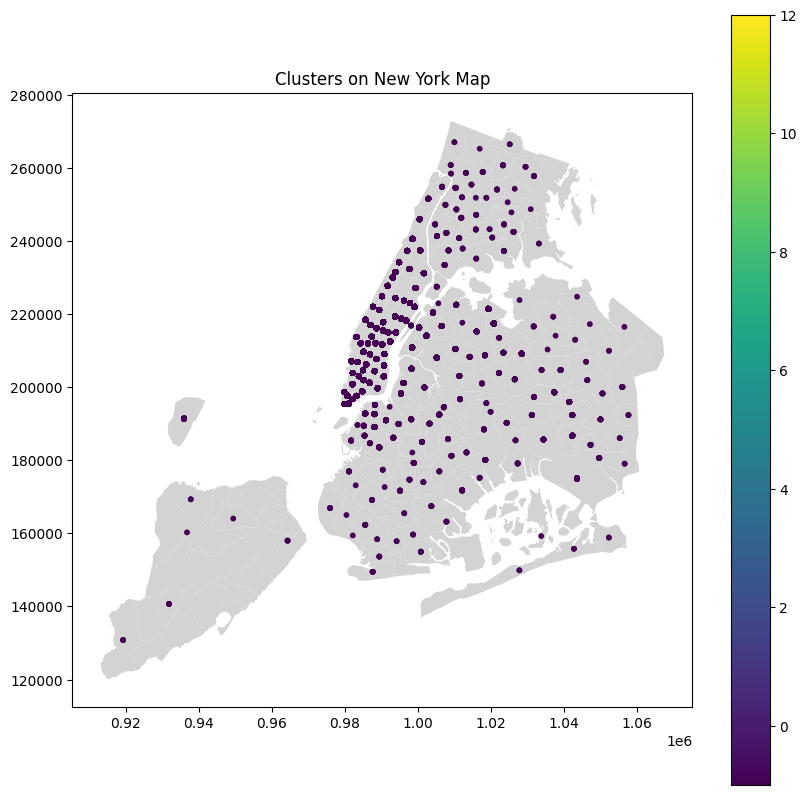

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile for New York map
ny_map = gpd.read_file(fp2)

# Create a GeoDataFrame for df_merged with pickup locations
df_merged_geo = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged['PickupLongitude'], df_merged['PickupLatitude']))

# Plot the New York map
fig, ax = plt.subplots(figsize=(10, 10))
ny_map.plot(ax=ax, color='lightgray')

# Plot clusters on the map
df_merged_geo.plot(ax=ax, markersize=10, column='cluster', legend=True)

# Set the title
plt.title('Clusters on New York Map')

# Show the plot
plt.show()


**Question-2** Vehicles Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from collections import Counter
# from IPython.display import Image

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
file_path_V = '/content/drive/MyDrive/MSDSM/SEM_2/Data_Mining/Assignment_1/Q2.csv'

In [ ]:
#Reading CSV file given for Vehicles
df=pd.read_csv(file_path_V)

In [ ]:
#Displaying First Five Entries of File
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   States/Union Territories                                      37 non-null     object 
 1   Multiaxled/Articulated Vehicles (I)                           36 non-null     float64
 2   Trucks and Lorries (II)                                       36 non-null     float64
 3   Light Motor Vehicles (Goods) (II) - Four Wheelers             36 non-null     float64
 4   Light Motor Vehicles (Goods) (II) - Three Wheelers            36 non-null     float64
 5   Buses (IV) - Stage carriages                                  36 non-null     float64
 6   Buses (IV) - Contract carriages                               35 non-null     float64
 7   Buses (IV) - Private service vehicles                         35 non-null

In [ ]:
df.drop(df.index[-1], inplace=True)
df = df.drop('Total Transport (I TO VII)', axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   States/Union Territories                                      36 non-null     object 
 1   Multiaxled/Articulated Vehicles (I)                           35 non-null     float64
 2   Trucks and Lorries (II)                                       35 non-null     float64
 3   Light Motor Vehicles (Goods) (II) - Four Wheelers             35 non-null     float64
 4   Light Motor Vehicles (Goods) (II) - Three Wheelers            35 non-null     float64
 5   Buses (IV) - Stage carriages                                  35 non-null     float64
 6   Buses (IV) - Contract carriages                               34 non-null     float64
 7   Buses (IV) - Private service vehicles                         34 non-null

In [ ]:
#Display first five entries of data
df.head(5)

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0


Exploratory Data Analysis (Q2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   States/Union Territories                                      36 non-null     object 
 1   Multiaxled/Articulated Vehicles (I)                           35 non-null     float64
 2   Trucks and Lorries (II)                                       35 non-null     float64
 3   Light Motor Vehicles (Goods) (II) - Four Wheelers             35 non-null     float64
 4   Light Motor Vehicles (Goods) (II) - Three Wheelers            35 non-null     float64
 5   Buses (IV) - Stage carriages                                  35 non-null     float64
 6   Buses (IV) - Contract carriages                               34 non-null     float64
 7   Buses (IV) - Private service vehicles                         34 non-null

In [ ]:
#Finding if there are any null values
df.isnull().sum()

In [ ]:
#Replacing null values with zero
def replace_nullvalues(df):
    for column in df.columns:
        if column!="States/Union Territories":
            mean = df[column].mean()
            df[column].fillna(0.0, inplace=True)
    return df

df_mean_filled = replace_nullvalues(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   States/Union Territories                                      36 non-null     object 
 1   Multiaxled/Articulated Vehicles (I)                           36 non-null     float64
 2   Trucks and Lorries (II)                                       36 non-null     float64
 3   Light Motor Vehicles (Goods) (II) - Four Wheelers             36 non-null     float64
 4   Light Motor Vehicles (Goods) (II) - Three Wheelers            36 non-null     float64
 5   Buses (IV) - Stage carriages                                  36 non-null     float64
 6   Buses (IV) - Contract carriages                               36 non-null     float64
 7   Buses (IV) - Private service vehicles                         36 non-null

In [ ]:
df.describe()

,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0000,36.000000,3.600000e+01,36.000000,36.000000,36.00000
mean,45349.833333,161846.416667,130482.000000,59217.888889,27323.944444,9419.777778,3715.388889,7413.750000,65666.583333,26024.2500,4390.194444,1.668832e+05,60977.583333,1510.333333,12082.25000
std,144899.120119,187909.633254,186275.293387,107373.723527,47942.211119,18536.498802,8116.167672,17638.954984,79484.739342,56837.9179,10833.228340,2.604586e+05,163864.678441,5735.361222,58140.32259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
25%,0.000000,8285.250000,6568.750000,0.000000,1970.750000,0.000000,0.000000,0.000000,7681.000000,51.5000,0.000000,6.021500e+03,0.000000,0.000000,0.00000
50%,987.500000,120884.000000,47767.500000,4299.000000,13683.500000,601.500000,32.000000,38.500000,30579.500000,2619.0000,8.500000,3.122250e+04,439.000000,0.000000,0.00000
75%,24116.750000,221210.000000,184018.750000,86348.000000,32604.000000,7568.000000,2568.750000,3597.500000,99954.250000,27279.7500,1238.250000,2.112068e+05,10825.750000,253.750000,0.00000
max,857033.000000,718325.000000,740838.000000,468909.000000,263099.000000,81315.000000,36445.000000,87785.000000,334484.000000,293354.0000,47933.000000,1.036038e+06,701929.000000,33134.000000,340010.00000


Data Visualization for all States and for all kind of Vehicles

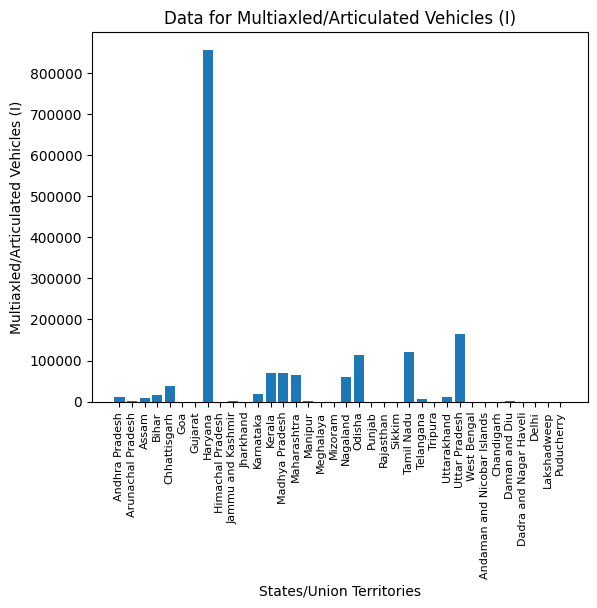

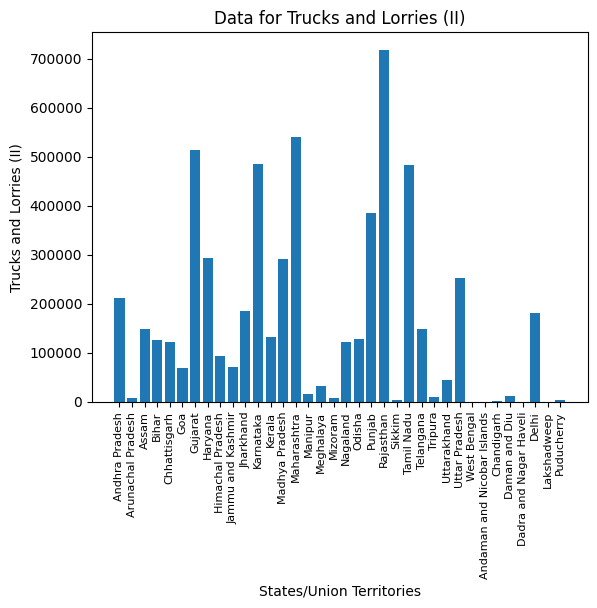

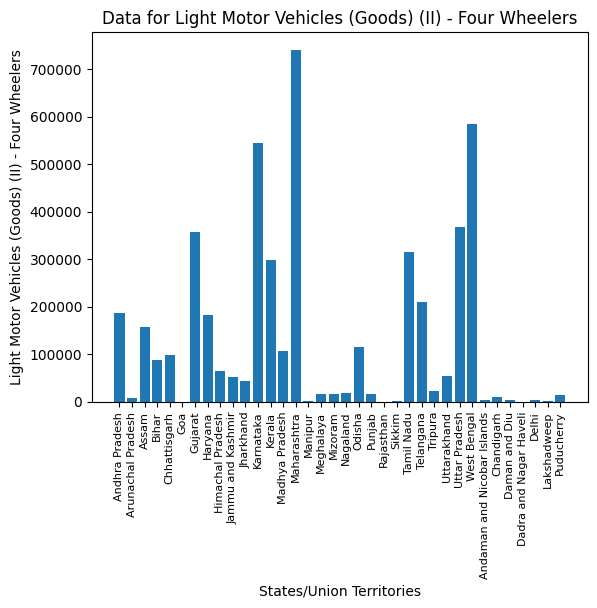

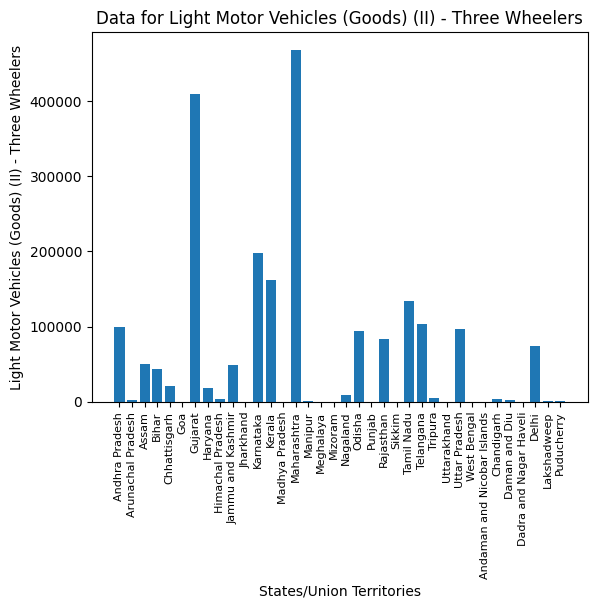

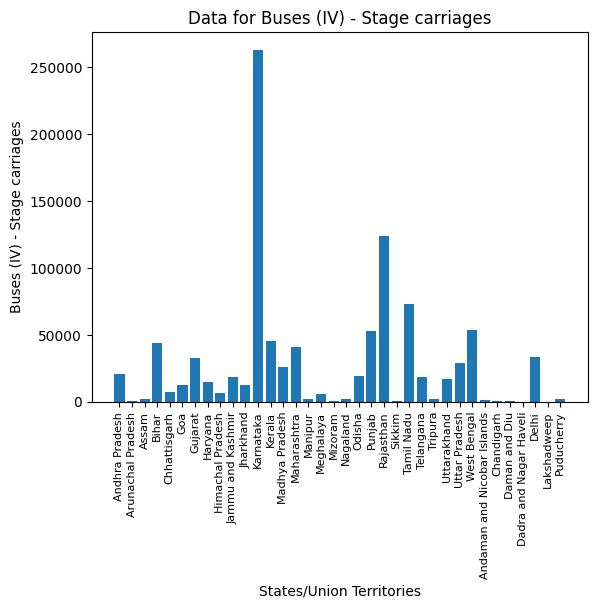

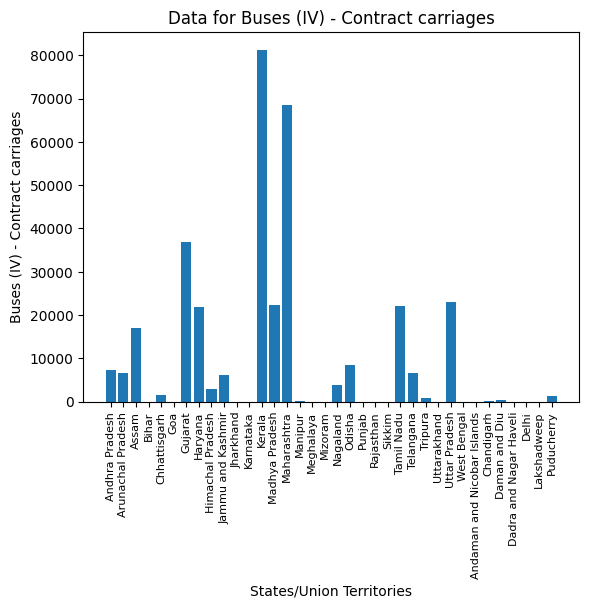

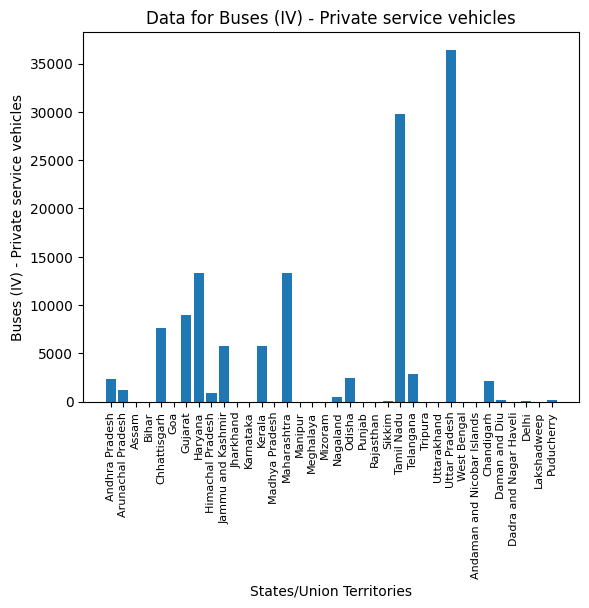

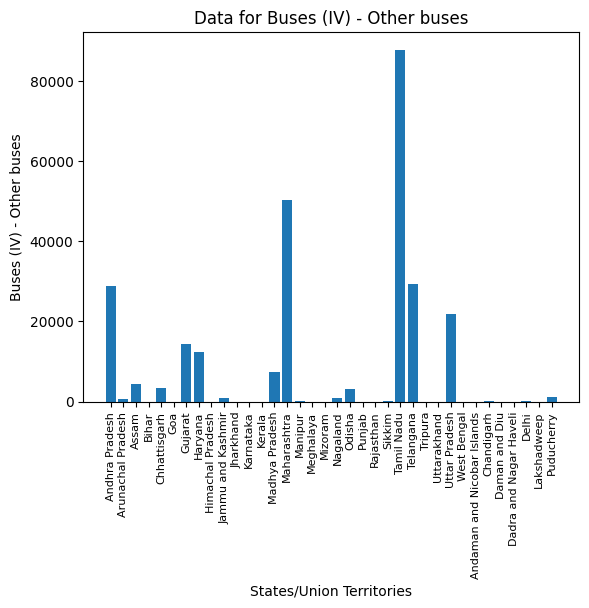

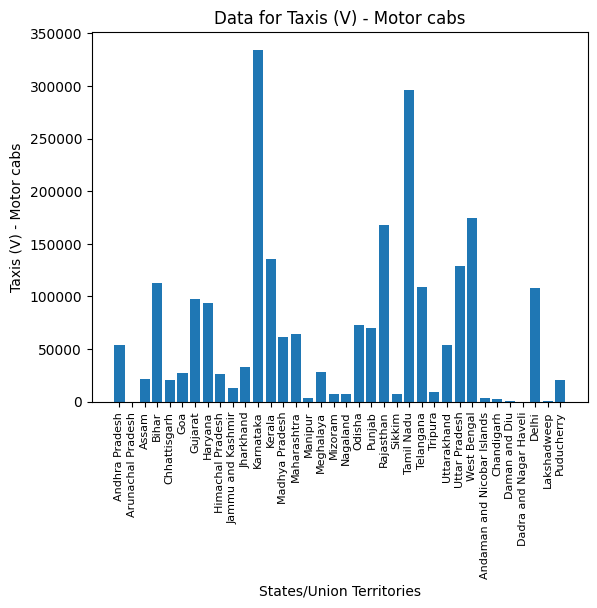

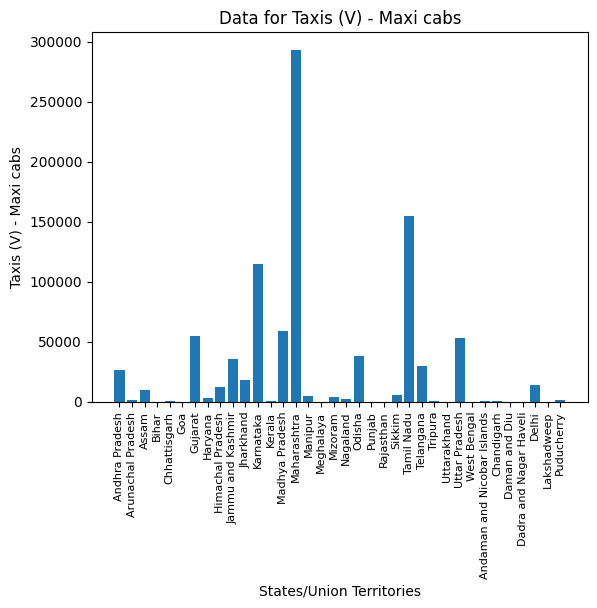

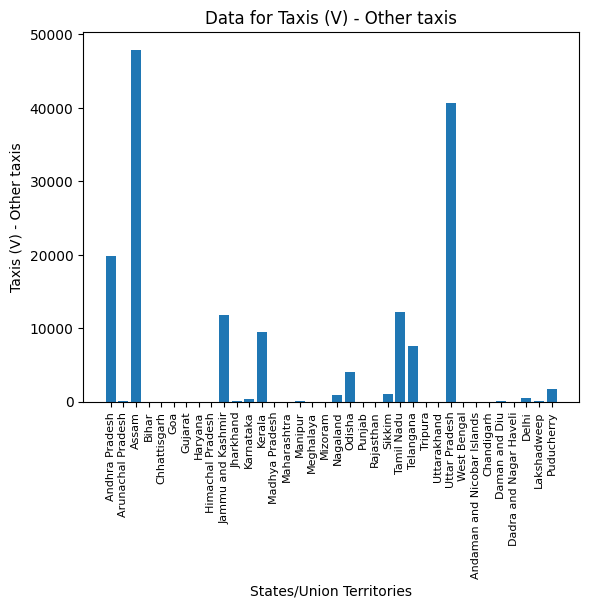

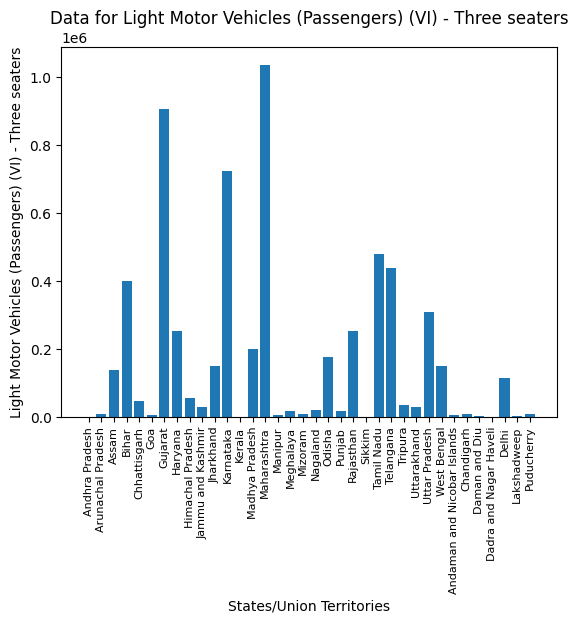

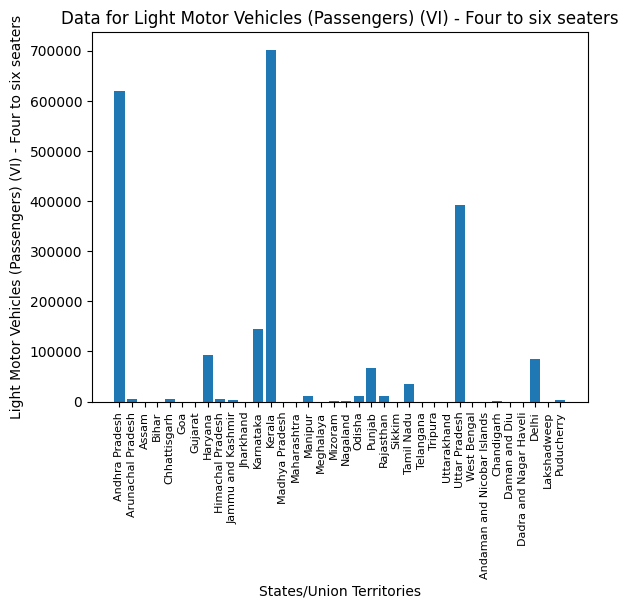

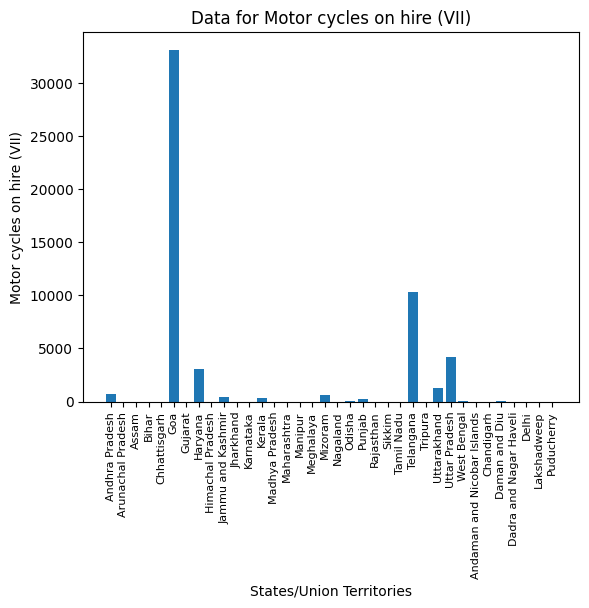

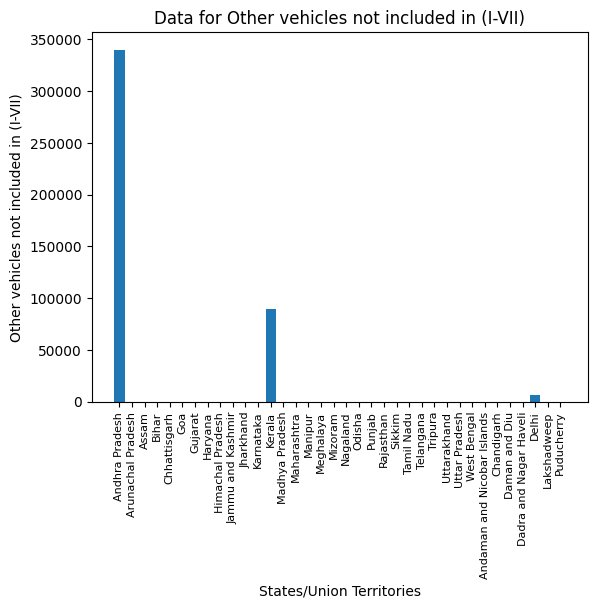

In [ ]:
import matplotlib.pyplot as plt

# Set the principal axis as "States/Union Territories"
principal_axis = "States/Union Territories"

# Iterate over each column
for column in df.columns:
    # Skip the principal axis column
    if column == principal_axis:
        continue

    # Create a plot for the current column
    plt.figure()
    plt.bar(df[principal_axis], df[column])
    plt.xlabel(principal_axis)
    plt.ylabel(column)
    plt.title(f"Data for {column}")
    plt.xticks(rotation=90, fontsize=8)  # Adjust the rotation and fontsize of x-axis labels
    plt.show()


In [ ]:
df.isnull().sum()

States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             0
Trucks and Lorries (II)                                         0
Light Motor Vehicles (Goods) (II) - Four Wheelers               0
Light Motor Vehicles (Goods) (II) - Three Wheelers              0
Buses (IV) - Stage carriages                                    0
Buses (IV) - Contract carriages                                 0
Buses (IV) - Private service vehicles                           0
Buses (IV) - Other buses                                        0
Taxis (V) - Motor cabs                                          0
Taxis (V) - Maxi cabs                                           0
Taxis (V) - Other taxis                                         0
Light Motor Vehicles (Passengers) (VI) - Three seaters          0
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    0
Motor cycles on hire (VII)                                      0
Other vehi

In [ ]:
#Creating Components such as Goods Vehicles, Buses, Cars and other vehicles by merging them
vehicles_df = pd.DataFrame()
vehicles_df['Goods Vehicles'] = df['Trucks and Lorries (II)'] + df['Multiaxled/Articulated Vehicles (I)'] + df['Light Motor Vehicles (Goods) (II) - Four Wheelers'] + df['Light Motor Vehicles (Goods) (II) - Three Wheelers']
vehicles_df['Buses'] = df['Buses (IV) - Contract carriages'] + df['Buses (IV) - Private service vehicles'] + df['Buses (IV) - Stage carriages'] + df['Buses (IV) - Other buses']
vehicles_df['Cars'] = df['Taxis (V) - Maxi cabs'] + df['Taxis (V) - Other taxis'] + df['Taxis (V) - Motor cabs'] + df['Light Motor Vehicles (Passengers) (VI) - Three seaters'] + df['Light Motor Vehicles (Passengers) (VI) - Four to six seaters']
vehicles_df['Other Vehicles'] = df['Motor cycles on hire (VII)'] + df['Other vehicles not included in (I-VII)']

In [ ]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Goods Vehicles  36 non-null     float64
 1   Buses           36 non-null     float64
 2   Cars            36 non-null     float64
 3   Other Vehicles  36 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [ ]:
vehicles_df=pd.DataFrame(vehicles_df)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Goods Vehicles  36 non-null     float64
 1   Buses           36 non-null     float64
 2   Cars            36 non-null     float64
 3   Other Vehicles  36 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [ ]:
#Displaying whole data
vehicles_df.head(36)

,Goods Vehicles,Buses,Cars,Other Vehicles
0,507802.0,59299.0,719820.0,340713.0
1,17769.0,9280.0,12447.0,0.0
2,363919.0,23606.0,215866.0,0.0
3,271982.0,43875.0,511822.0,0.0
4,278125.0,19727.0,74680.0,0.0
5,67933.0,12641.0,31911.0,33134.0
6,1278861.0,92533.0,1057857.0,0.0
7,1352278.0,62221.0,441665.0,3076.0
8,161377.0,10284.0,98671.0,0.0
9,171955.0,31474.0,90480.0,390.0


In [ ]:
vehicles_df.describe()

,Goods Vehicles,Buses,Cars,Other Vehicles
count,3.600000e+01,36.000000,3.600000e+01,36.000000
mean,3.968961e+05,47872.861111,3.239419e+05,13592.583333
std,4.635758e+05,63673.309175,3.998939e+05,58231.461066
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.246000e+04,4392.750000,2.984875e+04,0.000000
50%,2.434850e+05,21666.500000,1.258420e+05,0.000000
75%,5.268762e+05,57862.750000,4.592042e+05,456.750000
max,1.813799e+06,263099.000000,1.393555e+06,340713.000000


In [ ]:
def find_optimum_no_clusters(df,max_k):
    df_numeric = df
    # Initialize an empty list to store the inertia values
    means=[]
    WCCS = []

    # Iterate over a range of cluster numbers from 1 to 10
    for num_clusters in range(1, max_k):
        # Create an instance of KMeans with the current number of clusters
        kmeans = KMeans(n_clusters=num_clusters)

        # Fit the KMeans model to the numeric dataframe
        kmeans.fit(df_numeric)
        means.append(num_clusters)

        # Append the inertia value to the list
        WCCS.append(kmeans.inertia_)

    # Plot the inertia values to visualize the elbow
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means, WCCS,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.title('Elbow Method')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

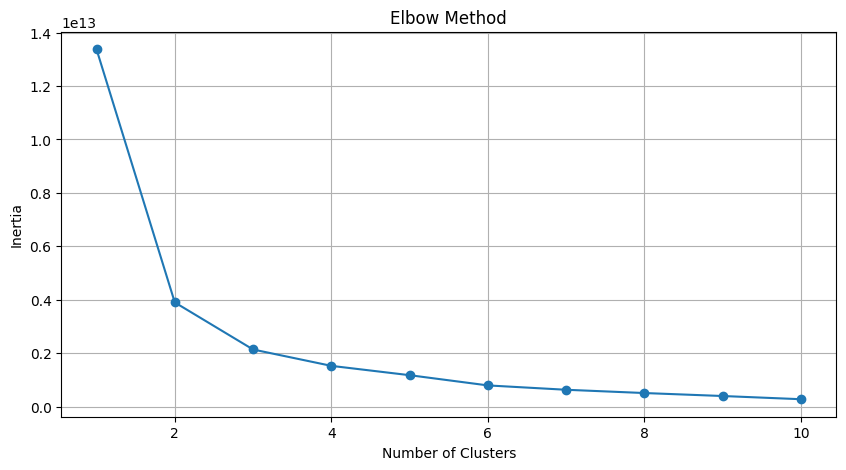

In [ ]:
# Find the optimum number of clusters
find_optimum_no_clusters(vehicles_df,11)

Since there is sharpe edge at 3, we will have 3 as optimum number of clusters.

In [ ]:
km=KMeans(n_clusters=3)
#X0=vehicles_df[['Goods Vehicles','Buses','Cars']]
X0=vehicles_df.to_numpy()
#y_predicted=km.fit_predict(df[["Multiaxled/Articulated Vehicles (I)","Trucks and Lorries (II)","Light Motor Vehicles (Goods) (II) - Four Wheelers","Buses (IV) - Stage carriages","Taxis (V) - Maxi cabs",]])
y_predicted=km.fit_predict(X0)
vehicles_df.cluster=y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-42-072ebe836396>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  vehicles_df.cluster=y_predicted


Text(0, 0.5, 'Buses')

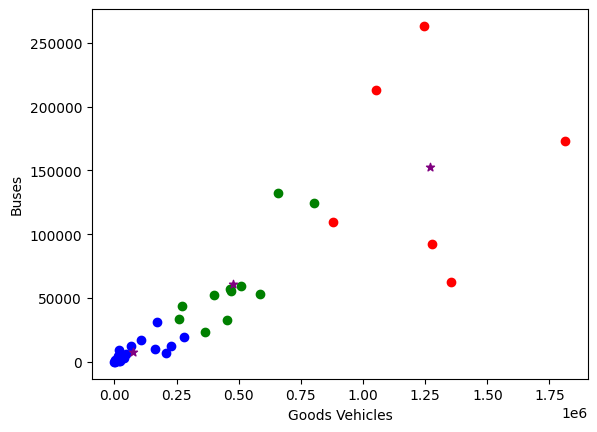

In [ ]:
df1=vehicles_df[vehicles_df.cluster==0]
df2=vehicles_df[vehicles_df.cluster==1]
df3=vehicles_df[vehicles_df.cluster==2]
plt.scatter(df1["Goods Vehicles"],df1["Buses"],color='green')
plt.scatter(df2["Goods Vehicles"],df2["Buses"],color='red')
plt.scatter(df3["Goods Vehicles"],df3["Buses"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Goods Vehicles')
plt.ylabel('Buses')

Text(0, 0.5, 'Cars')

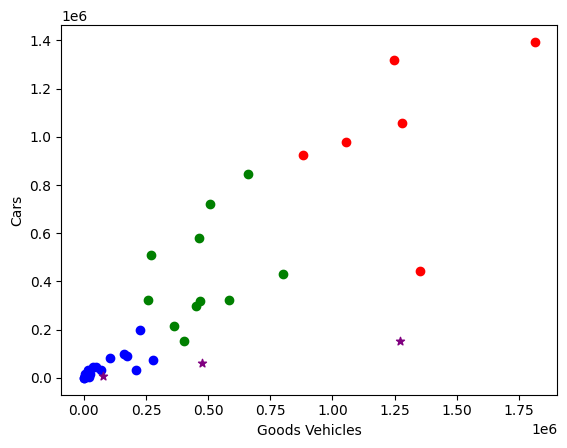

In [ ]:
df1=vehicles_df[vehicles_df.cluster==0]
df2=vehicles_df[vehicles_df.cluster==1]
df3=vehicles_df[vehicles_df.cluster==2]
plt.scatter(df1["Goods Vehicles"],df1["Cars"],color='green')
plt.scatter(df2["Goods Vehicles"],df2["Cars"],color='red')
plt.scatter(df3["Goods Vehicles"],df3["Cars"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Goods Vehicles')
plt.ylabel('Cars')

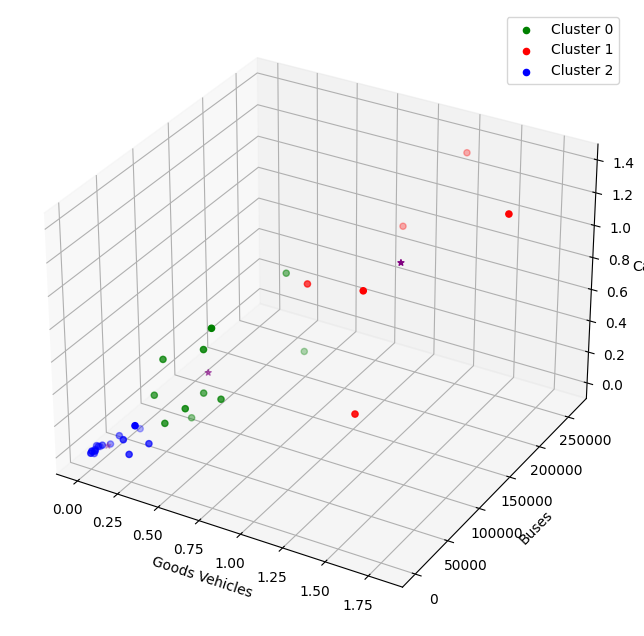

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df1 = vehicles_df[vehicles_df.cluster == 0]
df2 = vehicles_df[vehicles_df.cluster == 1]
df3 = vehicles_df[vehicles_df.cluster == 2]

ax.scatter(df1['Goods Vehicles'], df1['Buses'], df1['Cars'], color='green', label='Cluster 0')
ax.scatter(df2['Goods Vehicles'], df2['Buses'], df2['Cars'], color='red', label='Cluster 1')
ax.scatter(df3['Goods Vehicles'], df3['Buses'], df3['Cars'], color='blue', label='Cluster 2')
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],color='purple',marker='*')

ax.set_xlabel('Goods Vehicles')
ax.set_ylabel('Buses')
ax.set_zlabel('Cars')

ax.legend()

plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
amc = AgglomerativeClustering(n_clusters=3)
y_predicted=amc.fit_predict(X0)
vehicles_df.cluster=y_predicted
vehicles_df.head()

,Goods Vehicles,Buses,Cars,Other Vehicles
0,507802.0,59299.0,719820.0,340713.0
1,17769.0,9280.0,12447.0,0.0
2,363919.0,23606.0,215866.0,0.0
3,271982.0,43875.0,511822.0,0.0
4,278125.0,19727.0,74680.0,0.0


Text(0, 0.5, 'Buses')

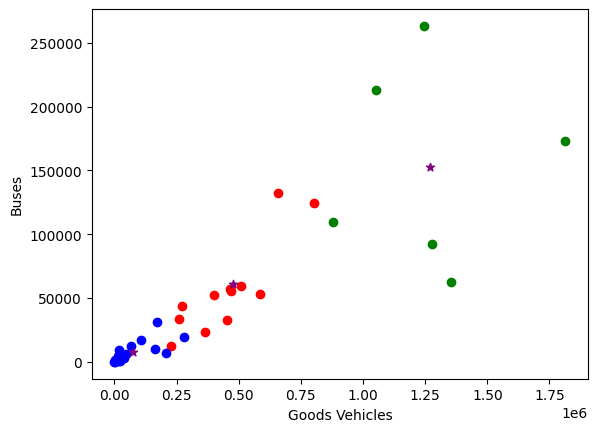

In [ ]:
df1=vehicles_df[vehicles_df.cluster==0]
df2=vehicles_df[vehicles_df.cluster==1]
df3=vehicles_df[vehicles_df.cluster==2]
plt.scatter(df1["Goods Vehicles"],df1["Buses"],color='green')
plt.scatter(df2["Goods Vehicles"],df2["Buses"],color='red')
plt.scatter(df3["Goods Vehicles"],df3["Buses"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Goods Vehicles')
plt.ylabel('Buses')

Text(0, 0.5, 'Cars')

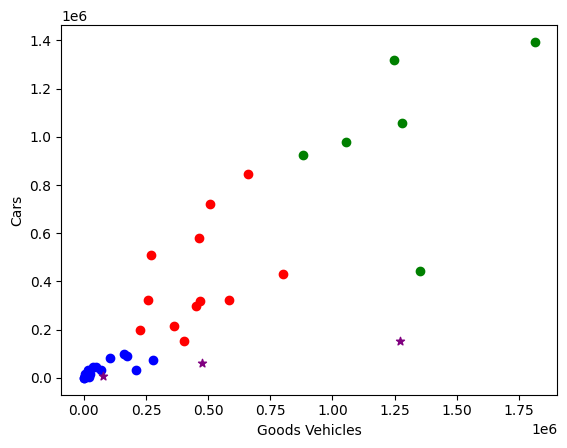

In [ ]:
df1=vehicles_df[vehicles_df.cluster==0]
df2=vehicles_df[vehicles_df.cluster==1]
df3=vehicles_df[vehicles_df.cluster==2]
plt.scatter(df1["Goods Vehicles"],df1["Cars"],color='green')
plt.scatter(df2["Goods Vehicles"],df2["Cars"],color='red')
plt.scatter(df3["Goods Vehicles"],df3["Cars"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Goods Vehicles')
plt.ylabel('Cars')

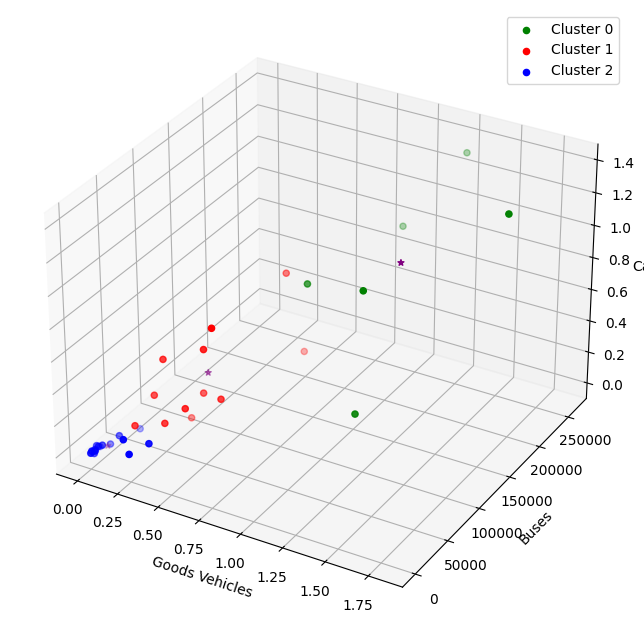

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df1 = vehicles_df[vehicles_df.cluster == 0]
df2 = vehicles_df[vehicles_df.cluster == 1]
df3 = vehicles_df[vehicles_df.cluster == 2]

ax.scatter(df1['Goods Vehicles'], df1['Buses'], df1['Cars'], color='green', label='Cluster 0')
ax.scatter(df2['Goods Vehicles'], df2['Buses'], df2['Cars'], color='red', label='Cluster 1')
ax.scatter(df3['Goods Vehicles'], df3['Buses'], df3['Cars'], color='blue', label='Cluster 2')
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],color='purple',marker='*')

ax.set_xlabel('Goods Vehicles')
ax.set_ylabel('Buses')
ax.set_zlabel('Cars')

ax.legend()

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(vehicles_df, y_predicted)

print(f"The silhouette score is: {silhouette_avg}")

The silhouette score is: 0.559108213677061


In [ ]:
vehicles_df.insert(0, 'States/Union Territories', df['States/Union Territories'])
vehicles_df.head()

,States/Union Territories,Goods Vehicles,Buses,Cars,Other Vehicles
0,Andhra Pradesh,507802.0,59299.0,719820.0,340713.0
1,Arunachal Pradesh,17769.0,9280.0,12447.0,0.0
2,Assam,363919.0,23606.0,215866.0,0.0
3,Bihar,271982.0,43875.0,511822.0,0.0
4,Chhattisgarh,278125.0,19727.0,74680.0,0.0


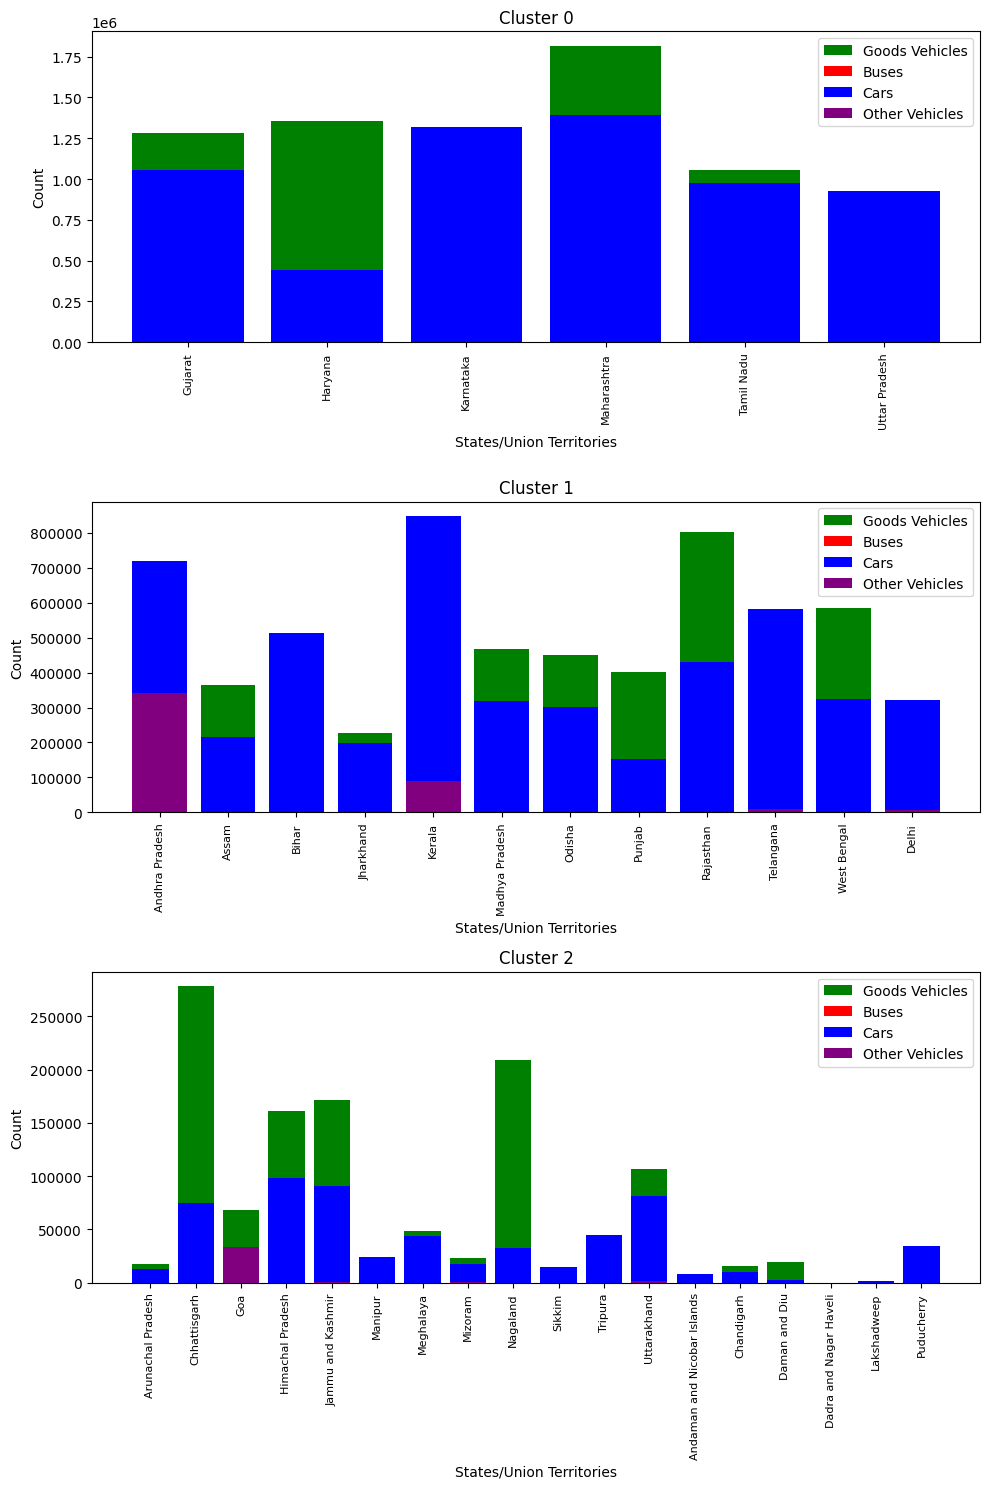

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each cluster
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram/bar for each cluster
for i in range(3):
    cluster_df = vehicles_df[vehicles_df.cluster == i]
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Goods Vehicles'], color='green', label='Goods Vehicles')
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Buses'], color='red', label='Buses')
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Cars'], color='blue', label='Cars')
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Other Vehicles'], color='purple', label='Other Vehicles')
    axs[i].set_xlabel('States/Union Territories')
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)  # Adjust the rotation and fontsize of x-axis labels
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


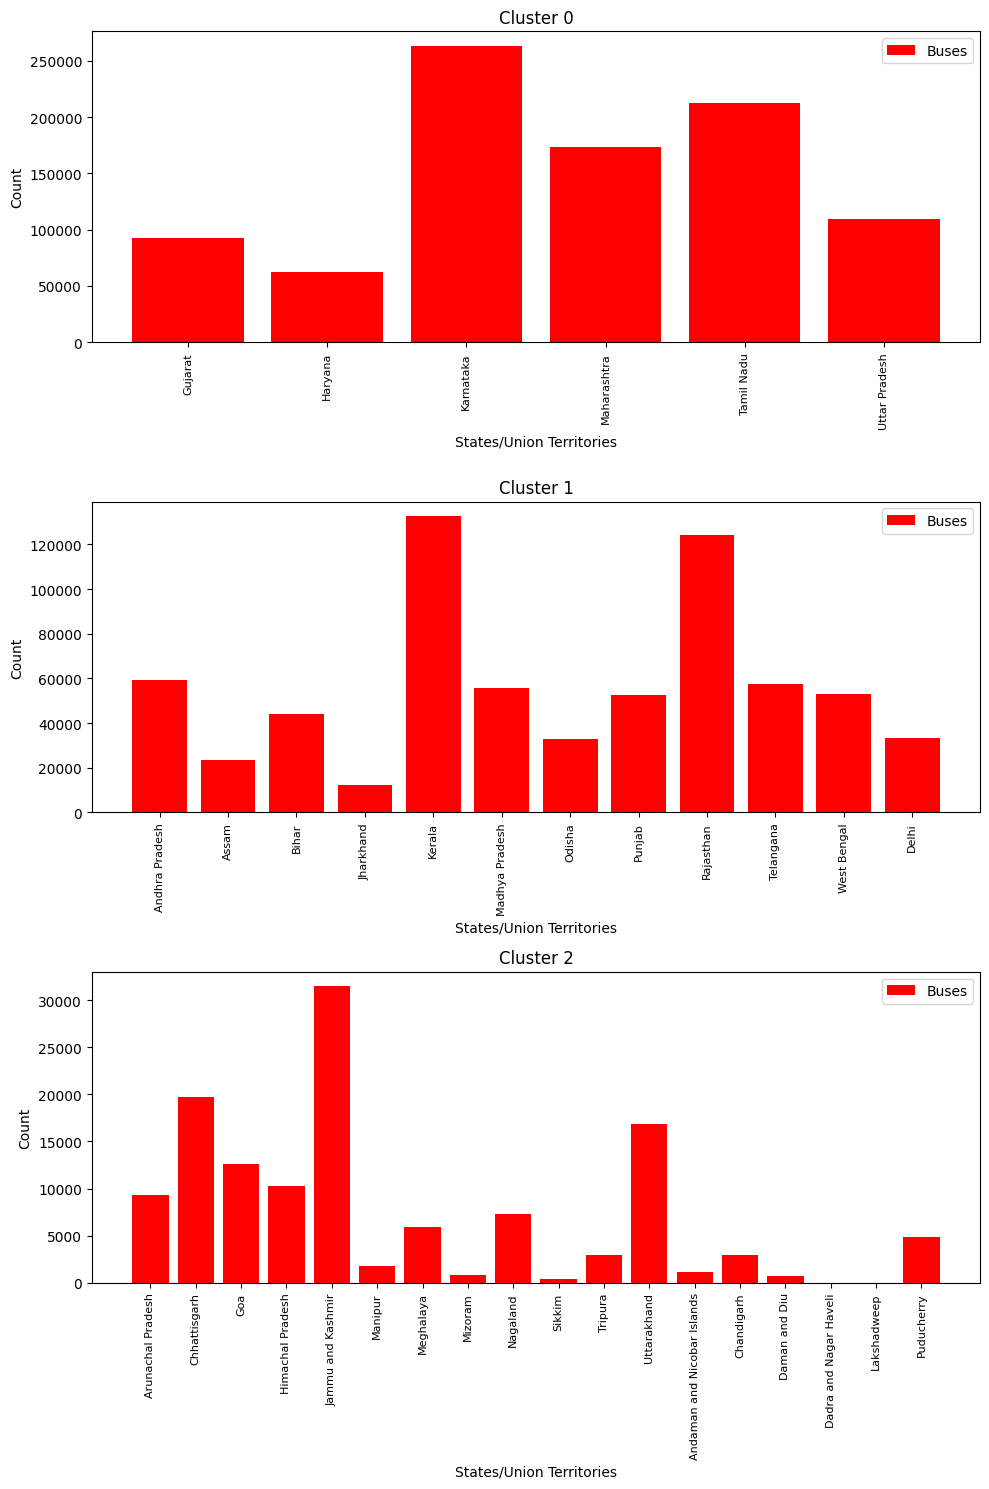

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each cluster
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram/bar for each cluster
for i in range(3):
    cluster_df = vehicles_df[vehicles_df.cluster == i]
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Buses'], color='red', label='Buses')
    axs[i].set_xlabel('States/Union Territories')
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)  # Adjust the rotation and fontsize of x-axis labels
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


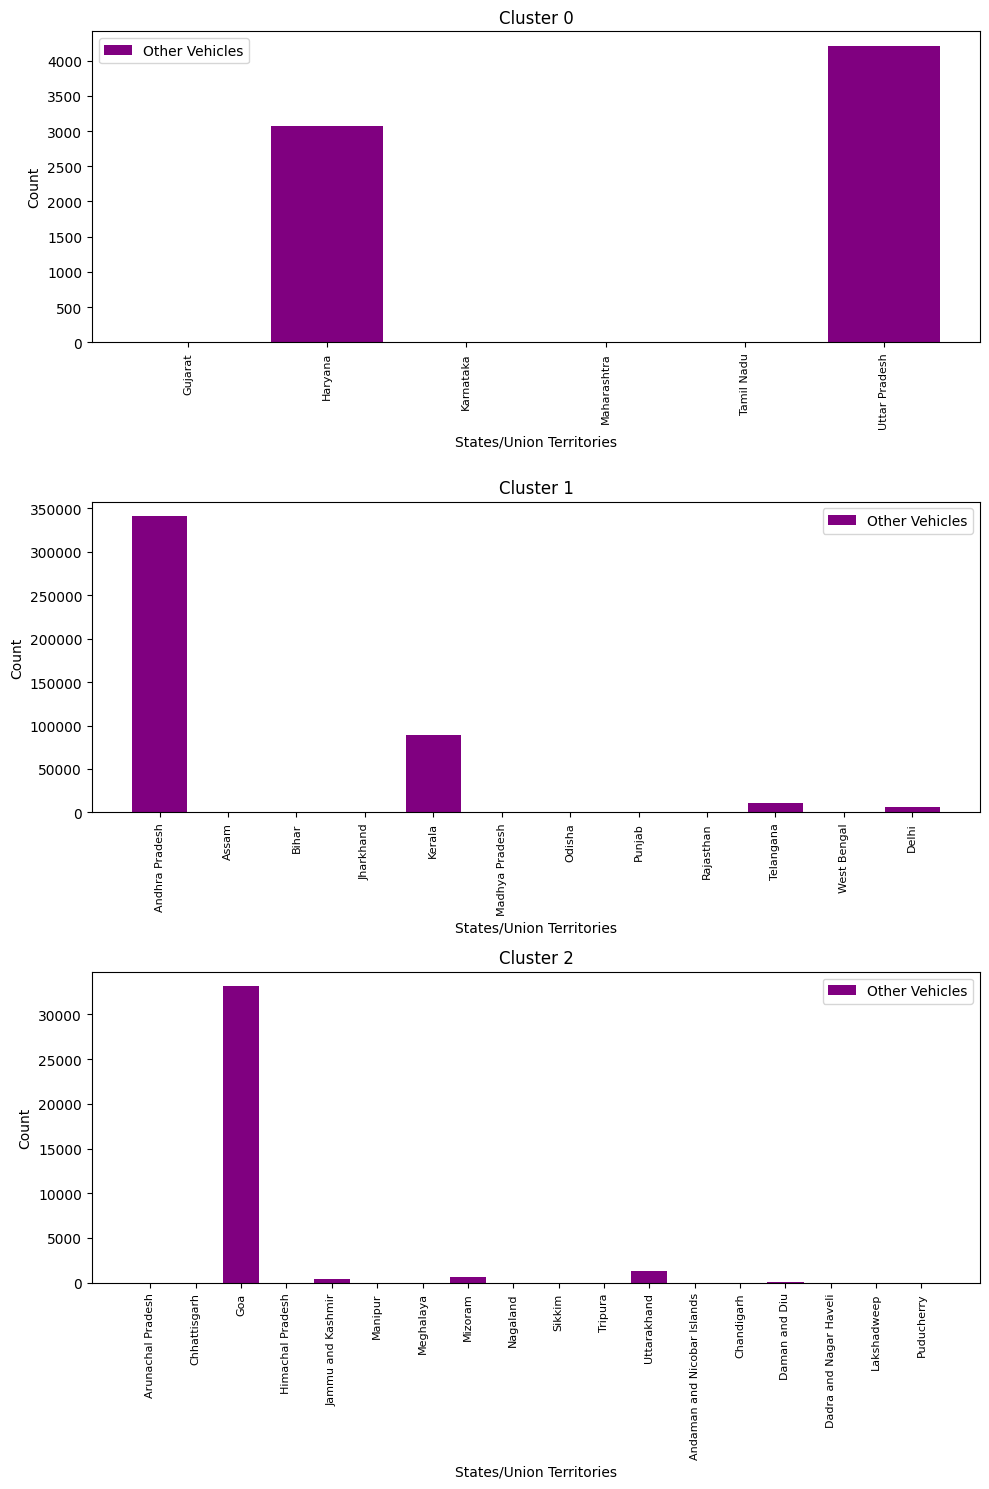

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each cluster
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram/bar for each cluster
for i in range(3):
    cluster_df = vehicles_df[vehicles_df.cluster == i]
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Other Vehicles'], color='purple', label='Other Vehicles')
    axs[i].set_xlabel('States/Union Territories')
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)  # Adjust the rotation and fontsize of x-axis labels
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


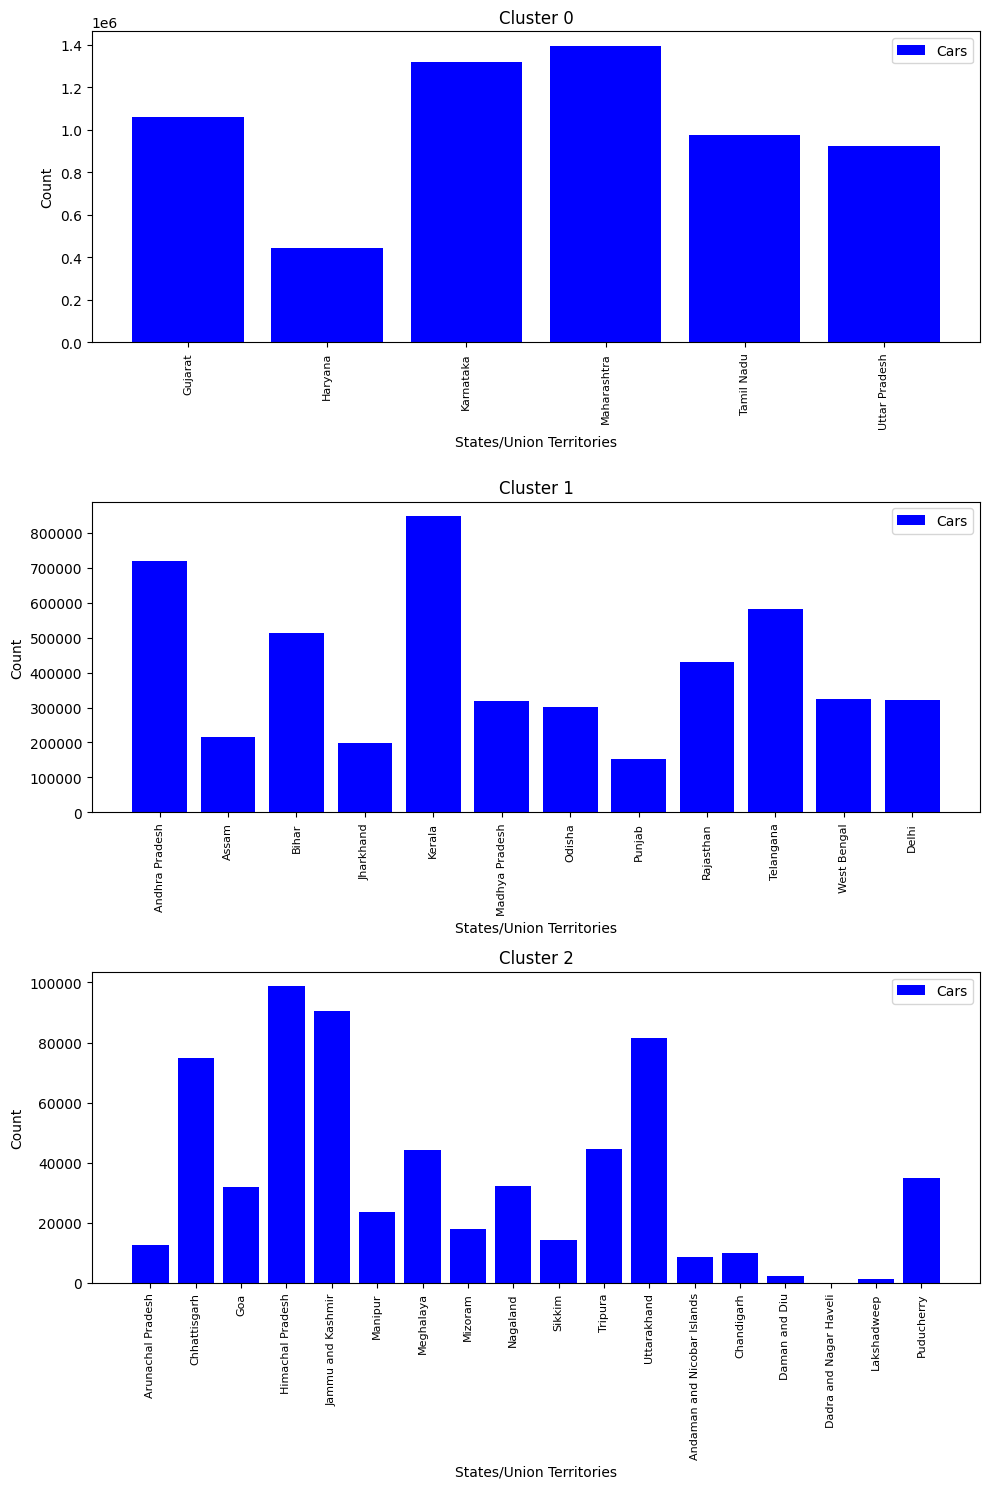

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each cluster
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram/bar for each cluster
for i in range(3):
    cluster_df = vehicles_df[vehicles_df.cluster == i]
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Cars'], color='blue', label='Cars')
    axs[i].set_xlabel('States/Union Territories')
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)  # Adjust the rotation and fontsize of x-axis labels
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


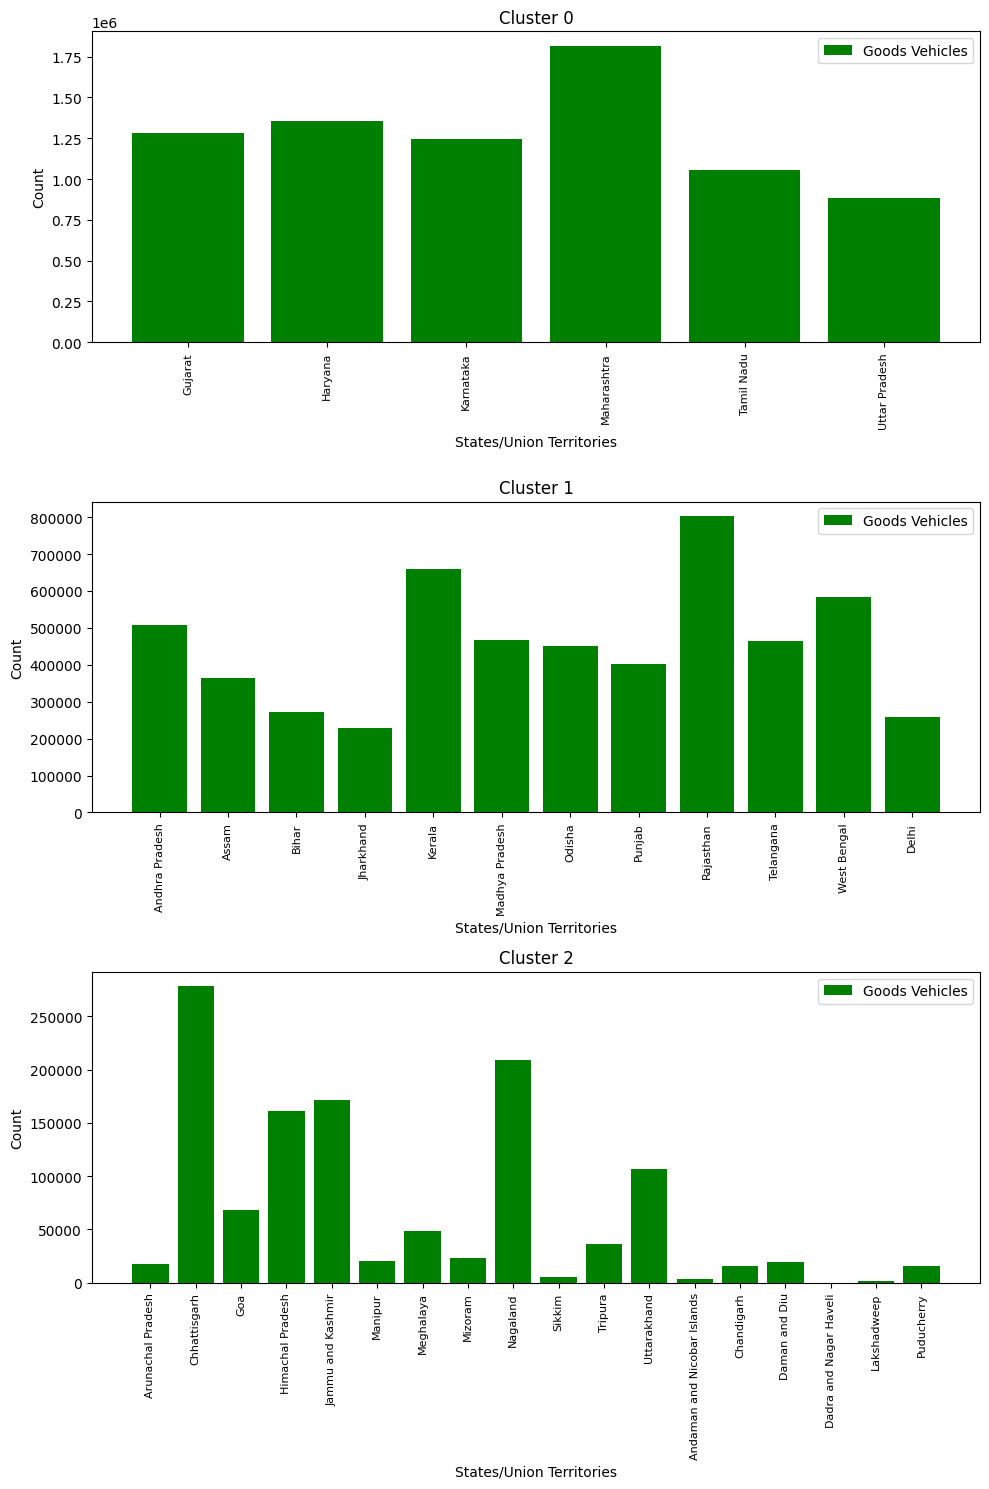

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for each cluster
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram/bar for each cluster
for i in range(3):
    cluster_df = vehicles_df[vehicles_df.cluster == i]
    axs[i].bar(cluster_df['States/Union Territories'], cluster_df['Goods Vehicles'], color='green', label='Goods Vehicles')
    axs[i].set_xlabel('States/Union Territories')
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)  # Adjust the rotation and fontsize of x-axis labels
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Cluster {i}')
    axs[i].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


From the above graphs and visualization We can infer the following:

1.   For the Marketing Activities, one can Target Maharashtra, Karnataka Gujarat, Haryana, Tamilnadu, Kerala, Telangana, Himachal Pradesh and Uttar Pradesh for the sell of cars as they have higher number of vehicle registrations.
2.   For the Marketing Activities, one can Target Maharashtra, Karnataka, Gujarat,Haryana, Tamilnadu, Chattisgarh, Himachal Pradesh, Nagaland, Jammu and Kashmir, Rajasthan and Punjab for the sell of goods vehicles.
3. For the Marketing Activities for  other vehicles like Motorcycles one can target Goa, Andhra Pradesh and Kerala.
4. For Buses we can target states Karnataka, Jammu and Kashmir, Tamilnadu, Maharashtra, Uttar Pradesh, Rajasthan.





**Question-3 Spotify**

In [ ]:
file_path_S = '/content/drive/MyDrive/MSDSM/SEM_2/Data_Mining/Assignment_1/spotify_dataset.csv'
spotifydf=pd.read_csv(file_path_S,nrows=100000,usecols=range(4))
spotifydf.head(10)

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
5,9cc0cfd4d7d7885102480dd99e7a90d6,Lissie,All Be Okay,HARD ROCK 2010
6,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Band On The Run,HARD ROCK 2010
7,9cc0cfd4d7d7885102480dd99e7a90d6,Joe Echo,Beautiful,HARD ROCK 2010
8,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,"Blackbird - Live at CitiField, NYC - Digital A...",HARD ROCK 2010
9,9cc0cfd4d7d7885102480dd99e7a90d6,Lissie,Bright Side,HARD ROCK 2010


In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

from collections import Counter
# from IPython.display import Image

In [ ]:
spotifydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          100000 non-null  object
 1    "artistname"    99916 non-null   object
 2    "trackname"     100000 non-null  object
 3    "playlistname"  99995 non-null   object
dtypes: object(4)
memory usage: 3.1+ MB


Exploratory Data Analysis

In [ ]:
spotifydf.isnull().sum()

user_id             0
 "artistname"      84
 "trackname"        0
 "playlistname"     5
dtype: int64

In [ ]:
spotifydf.iloc[:,1].fillna("No Artist", inplace=True)
spotifydf.iloc[:,3].fillna("No Playlist", inplace=True)

In [ ]:
spotifydf.isnull().sum()

user_id            0
 "artistname"      0
 "trackname"       0
 "playlistname"    0
dtype: int64

In [ ]:
spotifydf.rename(columns={spotifydf.columns[1]: "Artist_name"}, inplace=True)
spotifydf.rename(columns={spotifydf.columns[2]: "Track_name"}, inplace=True)
spotifydf.rename(columns={spotifydf.columns[3]: "Playlistname"}, inplace=True)

In [ ]:
print("\nAfter modifying first column:\n", spotifydf.columns)


After modifying first column:
 Index(['user_id', 'Artist_name', 'Track_name', 'Playlistname'], dtype='object')


In [ ]:
spotifydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  object
 1   Artist_name   100000 non-null  object
 2   Track_name    100000 non-null  object
 3   Playlistname  100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [ ]:
spotifydf.isnull().sum()

user_id         0
Artist_name     0
Track_name      0
Playlistname    0
dtype: int64

In [ ]:
spotifydf.describe()

,user_id,Artist_name,Track_name,Playlistname
count,100000,100000,100000,100000
unique,143,14001,64624,1988
top,db937456654d2465292c4daa947c95de,Johnny Cash,Intro,Starred
freq,10804,958,60,10844


In [ ]:
print("User unique: ",len(spotifydf.user_id.unique()))
print("Artist unique: ",len(spotifydf.Artist_name.unique()))
print("Country unique: ",len(spotifydf.Track_name.unique()))
print("Country unique: ",len(spotifydf.Playlistname.unique()))

User unique:  143
Artist unique:  14001
Country unique:  64624
Country unique:  1988


In [ ]:
spotifydf["Playlistname"].value_counts().head(10)

Starred                     10844
Everything at once           7892
Strane                       6825
Domaće                       2623
Liked from Radio             1829
Watercolors.                 1099
Folk                         1072
Vergaarbaak                   915
Narodne                       912
Las canciones de mi vida      852
Name: Playlistname, dtype: int64

In [ ]:
spotifydf["Artist_name"].value_counts().head(10)

Johnny Cash              958
Red Hot Chili Peppers    520
Azra                     436
JAY Z                    386
Blur                     352
Coldplay                 328
2Pac                     319
Arctic Monkeys           309
Kanye West               296
Daft Punk                286
Name: Artist_name, dtype: int64

In [ ]:
spotifydf["Track_name"].value_counts().head(10)

Intro         60
Home          53
Pompeii       38
Royals        33
Runaway       32
Heaven        31
Let Her Go    31
Alive         30
Trouble       29
Stay          28
Name: Track_name, dtype: int64

In [ ]:
# Group by user_id and count unique artists, playlists, and tracklists
group_userid = spotifydf.groupby("user_id").agg(
    artists_totalvalue=("Artist_name", "nunique"),
    playlists_totalvalue=("Playlistname", "nunique"),
    tracklists_totalvalue=("Track_name", "nunique")
)

# Find the maximum counts for each user
max_counts = group_userid.max(axis=1)

# Find the user with maximum counts for each category
max_artist_user = group_userid[group_userid['artists_totalvalue'] == max_counts]
max_playlist_user = group_userid[group_userid['playlists_totalvalue'] == max_counts]
max_tracklist_user = group_userid[group_userid['tracklists_totalvalue'] == max_counts]

# Display the result
print("All user ids with Maximum Artist Count:")
print(max_artist_user)
print("All user ids with Maximum Playlist Count:")
print(max_playlist_user)
print("All user ids Maximum Tracklist Count:")
print(max_tracklist_user)


All user ids with Maximum Artist Count:
                                  artists_totalvalue  playlists_totalvalue  \
user_id                                                                      
042055eb2f2bbed89bae2c91428c4532                   1                     1   
4bbfa779e1814016e4c04fb70a358776                  16                     1   
6c54565b1a7d885b4cc850d8f3d6a27b                   3                     1   
83d7007a034208cdb13b7d3c29a02005                  12                     1   
a239cee8ddb19e89e7576ad7bab7c5b4                  36                     1   
b62a2810ecba5b946e297411476a34af                   8                     2   
c75d47fe0e0b2ca6bcdfdd8f54c60662                   1                     1   
ce8559411c47c321add7625b720d6b63                   1                     1   
f844835ad2842f8134f4283a4a7554e2                   1                     1   

                                  tracklists_totalvalue  
user_id                                    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the maximum value for each total value count and the corresponding user ID
max_artist_count = group_userid['artists_totalvalue'].max()
max_artist_user_ids = group_userid[group_userid['artists_totalvalue'] == max_artist_count].index.tolist()

max_playlist_count = group_userid['playlists_totalvalue'].max()
max_playlist_user_ids = group_userid[group_userid['playlists_totalvalue'] == max_playlist_count].index.tolist()

max_tracklist_count = group_userid['tracklists_totalvalue'].max()
max_tracklist_user_ids = group_userid[group_userid['tracklists_totalvalue'] == max_tracklist_count].index.tolist()

# Display the maximum counts and corresponding user IDs
print("Maximum Artist Count:", max_artist_count, "for User IDs:", max_artist_user_ids)
print("Maximum Playlist Count:", max_playlist_count, "for User IDs:", max_playlist_user_ids)
print("Maximum Tracklist Count:", max_tracklist_count, "for User IDs:", max_tracklist_user_ids)


Maximum Artist Count: 2700 for User IDs: ['c50566d83fba17b20697039d5824db78']
Maximum Playlist Count: 91 for User IDs: ['bb7d07f6f0085b99ab0dedc1e1fae091']
Maximum Tracklist Count: 10540 for User IDs: ['db937456654d2465292c4daa947c95de']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert data for the apriori function making it to suitable format
basket_for_spotify = (spotifydf.groupby(["user_id","Artist_name"])["Playlistname"]
          .count().unstack().reset_index().fillna(0)
          .set_index('user_id'))

# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basketsets_spotify = basket_for_spotify.applymap(encode_units)

# Appliyng Apriori algo
frequent_itemsets_spotify = apriori(basketsets_spotify, min_support=0.1, use_colnames=True)

# association rules for spotify
rules_association_spotify = association_rules(frequent_itemsets_spotify, metric="lift", min_threshold=1)
print(rules_association_spotify)

print("_________________________________________________________________")
# Getting the strong association Rules by setting the confidence as 70% and lift more than 1 as postive corelation exist
print("\n\nSTRONG ASSOCIATION\n\n")
strong_rules = rules_association_spotify[(rules_association_spotify['confidence'] > 0.7) & (rules_association_spotify['lift'] > 1)]

print(strong_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             antecedents          consequents  antecedent support  \
0             (Bastille)     (Arctic Monkeys)            0.181818   
1       (Arctic Monkeys)           (Bastille)            0.265734   
2       (Arctic Monkeys)           (Coldplay)            0.265734   
3             (Coldplay)     (Arctic Monkeys)            0.244755   
4            (Daft Punk)     (Arctic Monkeys)            0.230769   
..                   ...                  ...                 ...   
193  (Drake, Kanye West)              (JAY Z)            0.111888   
194  (JAY Z, Kanye West)              (Drake)            0.153846   
195              (Drake)  (JAY Z, Kanye West)            0.146853   
196              (JAY Z)  (Drake, Kanye West)            0.230769   
197         (Kanye West)       (Drake, JAY Z)            0.216783   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.265734  0.104895    0.576923  2.171053  0.056580    1.735537   
1        

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Group by user_id and playlistname and counting occurrences of artistname
basketsets_spotify = (spotifydf.groupby(["user_id","Playlistname"])["Artist_name"]
          .count().unstack().reset_index().fillna(0)
          .set_index('user_id'))


# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basketsets_spotify = basket_for_spotify.applymap(encode_units)

# Appliyng Apriori algo
frequent_itemsets_spotify = apriori(basketsets_spotify, min_support=0.1, use_colnames=True)

# association rules for spotify
rules_association_spotify = association_rules(frequent_itemsets_spotify, metric="lift", min_threshold=1)
print(rules_association_spotify)

print("_________________________________________________________________")
# Getting the strong association Rules by setting the confidence as 70% and lift more than 1 as postive corelation exist
print("\n\nSTRONG ASSOCIATION\n\n")
strong_rules = rules_association_spotify[(rules_association_spotify['confidence'] > 0.7) & (rules_association_spotify['lift'] > 1)]

print(strong_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             antecedents          consequents  antecedent support  \
0             (Bastille)     (Arctic Monkeys)            0.181818   
1       (Arctic Monkeys)           (Bastille)            0.265734   
2       (Arctic Monkeys)           (Coldplay)            0.265734   
3             (Coldplay)     (Arctic Monkeys)            0.244755   
4            (Daft Punk)     (Arctic Monkeys)            0.230769   
..                   ...                  ...                 ...   
193  (Drake, Kanye West)              (JAY Z)            0.111888   
194  (JAY Z, Kanye West)              (Drake)            0.153846   
195              (Drake)  (JAY Z, Kanye West)            0.146853   
196              (JAY Z)  (Drake, Kanye West)            0.230769   
197         (Kanye West)       (Drake, JAY Z)            0.216783   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.265734  0.104895    0.576923  2.171053  0.056580    1.735537   
1        

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Group by user_id and playlistname and counting occurrences of artistname
basketsets_spotify = (spotifydf.groupby(["user_id","Artist_name"])["Playlistname"]
          .count().unstack().reset_index().fillna(0)
          .set_index('user_id'))


# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basketsets_spotify = basket_for_spotify.applymap(encode_units)

# Appliyng Apriori algo
frequent_itemsets_spotify = apriori(basketsets_spotify, min_support=0.5, use_colnames=True)

# association rules for spotify
rules_association_spotify = association_rules(frequent_itemsets_spotify, metric="lift", min_threshold=.5)
print(rules_association_spotify)

print("_________________________________________________________________")
# Getting the strong association Rules by setting the confidence as 70% and lift more than 1 as postive corelation exist
print("\n\nSTRONG ASSOCIATION\n\n")
strong_rules = rules_association_spotify[(rules_association_spotify['confidence'] > 0.7) & (rules_association_spotify['lift'] > 1)]

print(strong_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.